## **Unlocking Trade Value: An Analytical Approach to Imports, Exports, and Supply Chain Efficiency using Interactive Dashboard**
 **Student Name:** Krishnendu Adhikary

 **Roll No:** 055022

### **Description of DATA**

This dataset provides detailed information on international trade transactions, capturing both import and export activities. It includes comprehensive data on various aspects of trade, making it a valuable resource for business analysis, economic research, and financial modeling.

**Data Source:** https://www.kaggle.com/datasets/chakilamvishwas/imports-exports-15000

**Data Size:** 3001 rows × 16 columns

**Data Type:** Cross-sectional

**Data Dimension:** 16 Variables and 3001 Observations

**Data Variable Types:** Text(11), Integer(3), Decimal(2)

**Data Variable Category:**

Index: Transaction_ID, Invoice_Number, Customs_Code

Nominal Categorical: Country, Product, Import_Export, Category, Port, Shipping_Method, Supplier, Customer

Ordinal Categorical: Payment_Terms

Non-Categorical: Quantity, Value, Weight, Date

### **OBJECTIVES**
**1. Identify High-Value Markets and Monitor Market Engagement:**
Analyze transaction value distribution and transaction frequency across countries to identify high-revenue regions and track market activity levels. This helps prioritize regions for market expansion, adjust sales strategies, and optimize resource allocation.

**2. Optimize Pricing, Shipping, and Product Prioritization:**
Examine the relationship between product weight, pricing, and transaction value to optimize logistics and pricing strategies. Additionally, identify top-performing products by transaction value to focus on the most profitable items in inventory management and marketing.

**3. Evaluate and Improve Supply Chain Efficiency:**
Assess logistics efficiency across different regions based on payment terms and other metrics to streamline supply chain operations, reduce bottlenecks, and enhance overall service delivery. This ensures cost-effective and efficient operations.

**4. Enhance Supplier Relationships and Cash Flow Management:**
Analyze supplier payment terms across countries to improve cash flow, negotiate favorable terms, and strengthen supplier relationships. This helps align supplier performance with the company’s financial objectives, ensuring smoother operations.

**5. Understand Financial Performance and Forecasting:**
Use key business metrics, such as transaction value distribution and profitability analysis across regions, to understand financial variability and forecast future performance. These insights will guide strategic decision-making and help maximize profitability.

#### **Importing Required Libraries and Sample Data**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the dataset
dataset=pd.read_csv("D:\\MBA materials\\Trimester 1\\DEVP(AMitra)\\Imports_Exports_Dataset.csv")

#Taking the sample dataset
df=dataset.sample(n=3001 , random_state=55022)
df.head(5)

,Transaction_ID,Country,Product,Import_Export,Quantity,Value,Date,Category,Port,Customs_Code,Weight,Shipping_Method,Supplier,Customer,Invoice_Number,Payment_Terms
13299,21c15b8c-095f-47f0-bbb8-0d973d1ae822,Sierra Leone,hotel,Export,8005,4782.17,31-12-2021,Clothing,Hendricksfurt,581820,3371.58,Sea,Welch PLC,Emily Pollard,35885149,Net 30
1005,00b425aa-e7eb-433c-ba08-79fbdc7843b3,Guyana,certain,Import,5498,5417.59,29-10-2021,Machinery,Washingtontown,238106,3091.78,Sea,Briggs Group,Carrie Gonzalez,12082455,Prepaid
11365,4a81f8cd-ad29-4bf6-bc47-6b1d4afbca42,Peru,prevent,Import,6184,3142.30,20-09-2021,Electronics,Lake Annaberg,128697,442.11,Sea,Vazquez and Sons,Jacob Nguyen,98353826,Net 60
11101,3c55f669-aeac-4ca9-9fb8-71f22210e897,Costa Rica,also,Import,6813,5471.28,25-06-2024,Toys,Farrellburgh,864986,4711.86,Sea,Morris Group,Claudia Hart,37340107,Net 30
728,0876daaa-01ce-4fc6-b2d1-16fe8f08963c,Yemen,clear,Export,3791,462.21,01-07-2022,Machinery,Jamesfurt,462912,4220.17,Land,Andrade-Young,Brian Gregory,72980641,Cash on Delivery


### **PROBLEM STATEMENTS & ANALYSIS**
#### **1. Transaction Value Distribution by Country (Top 10):**

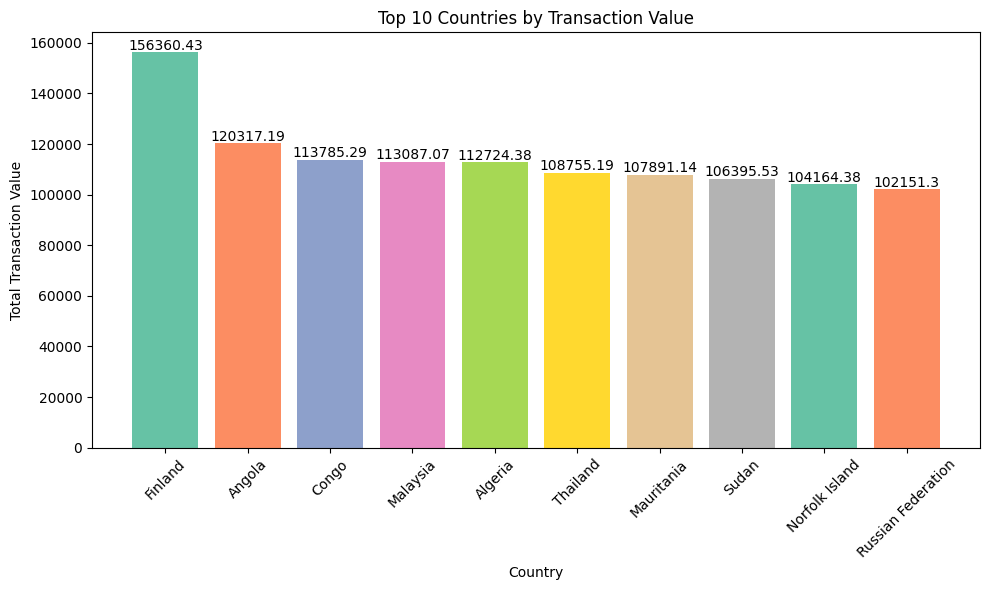

In [3]:
top_countries = df.groupby('Country')['Value'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
plt.bar(top_countries.index, top_countries.values, color=sns.color_palette('Set2'))
plt.title('Top 10 Countries by Transaction Value')
plt.xlabel('Country')
plt.ylabel('Total Transaction Value')
plt.xticks(rotation=45)
for i, value in enumerate(top_countries.values):
    plt.text(i, value + 1000, str(value), ha='center')
plt.tight_layout()
plt.show()

#### **2. Correlation Between Quantity and Transaction Value:**

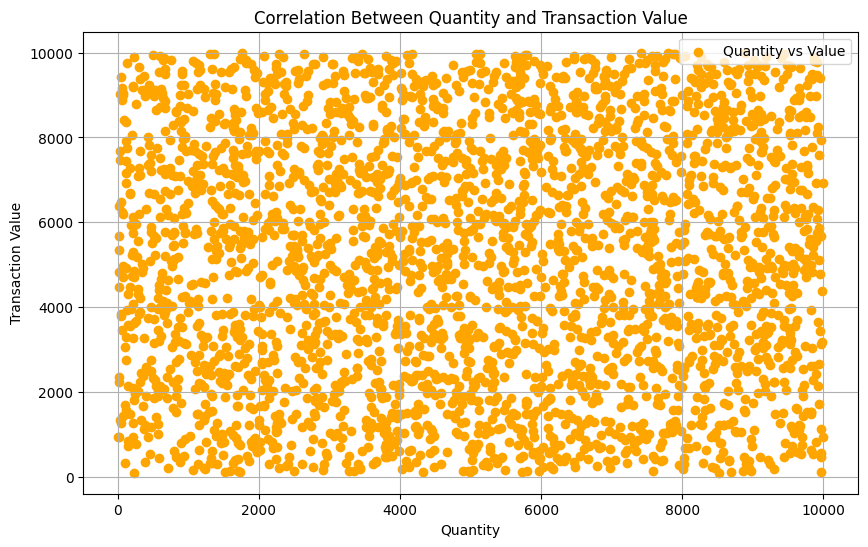

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Quantity'], df['Value'], color='orange', label='Quantity vs Value')
plt.title('Correlation Between Quantity and Transaction Value')
plt.xlabel('Quantity')
plt.ylabel('Transaction Value')
plt.grid(True)
plt.legend()
plt.show()

#### **3. Shipping Method Comparison by Transaction Value:**

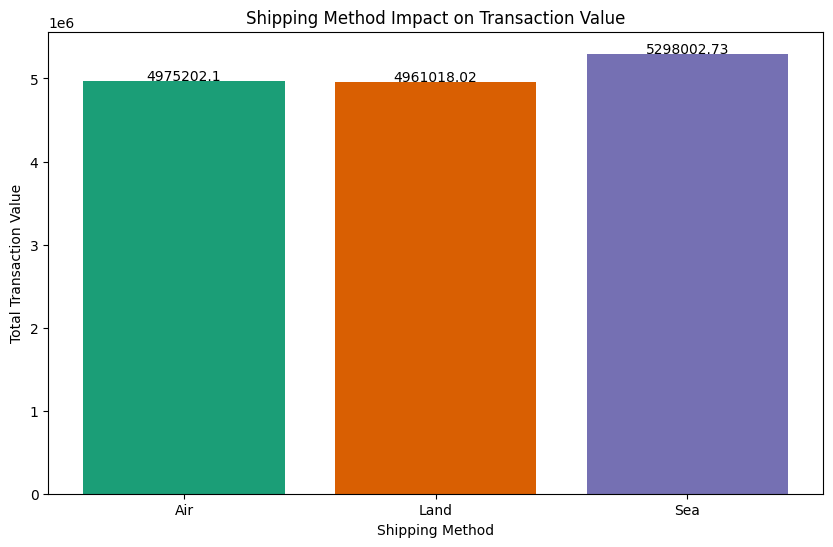

In [5]:
plt.figure(figsize=(10, 6))
shipping_agg = df.groupby('Shipping_Method')['Value'].sum()
plt.bar(shipping_agg.index, shipping_agg.values, color=sns.color_palette('Dark2'))
plt.title('Shipping Method Impact on Transaction Value')
plt.xlabel('Shipping Method')
plt.ylabel('Total Transaction Value')
for i, value in enumerate(shipping_agg.values):
    plt.text(i, value + 1000, str(value), ha='center')
plt.show()

#### **4. Top Products by Transaction Value:**

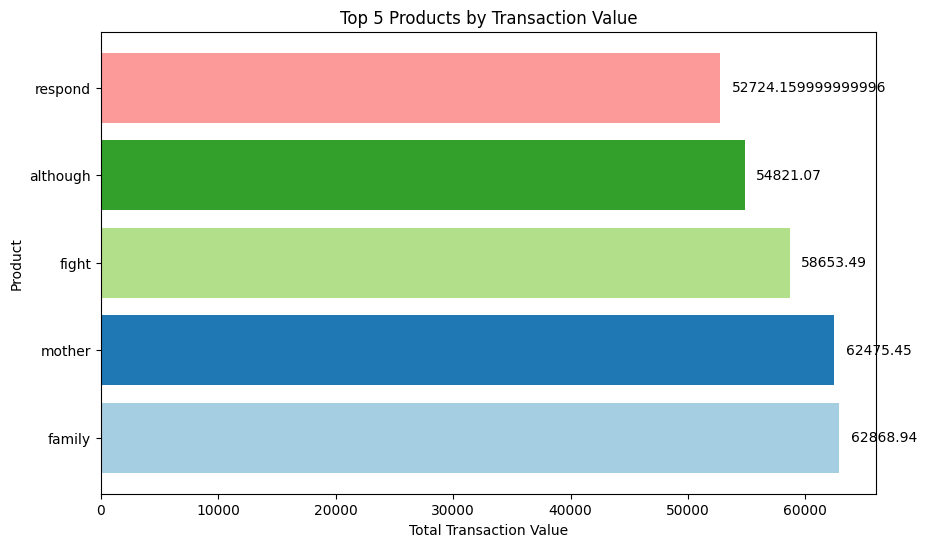

In [6]:
plt.figure(figsize=(10, 6))
top_products = df.groupby('Product')['Value'].sum().nlargest(5)
plt.barh(top_products.index, top_products.values, color=sns.color_palette('Paired'))
plt.title('Top 5 Products by Transaction Value')
plt.xlabel('Total Transaction Value')
plt.ylabel('Product')
for i, value in enumerate(top_products.values):
    plt.text(value + 1000, i, str(value), va='center')
plt.show()

#### **5. Top Suppliers Performance by Transaction Value:**

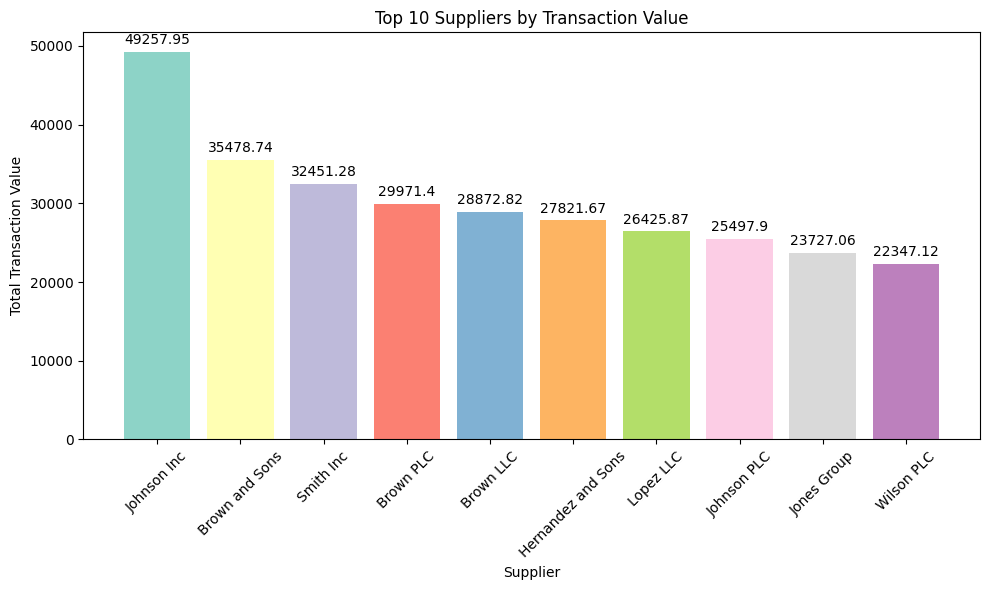

In [7]:
# Calculate total transaction value by supplier and get the top 10 suppliers
top_suppliers = df.groupby('Supplier')['Value'].sum().nlargest(10)

# Bar Chart for Top 10 Suppliers by Transaction Value
plt.figure(figsize=(10, 6))
plt.bar(top_suppliers.index, top_suppliers.values, color=sns.color_palette('Set3'))
plt.title('Top 10 Suppliers by Transaction Value')
plt.xlabel('Supplier')
plt.ylabel('Total Transaction Value')
plt.xticks(rotation=45)

# Add data labels on the bars
for i, value in enumerate(top_suppliers.values):
    plt.text(i, value + 1000, str(value), ha='center')

plt.tight_layout()
plt.show()

#### **6. Import vs Export Revenue Share:**

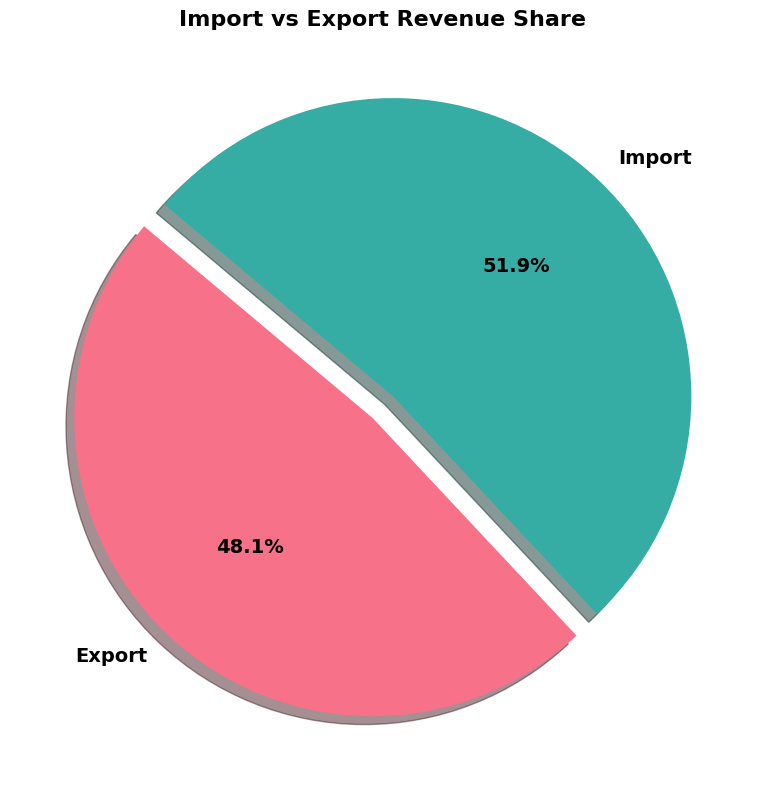

In [8]:
# Calculate total transaction value for Import vs Export
import_export_agg = df.groupby('Import_Export')['Value'].sum()

# Define vibrant colors using a seaborn color palette
colors = sns.color_palette('husl', len(import_export_agg))  # 'husl' gives vibrant colors

# Pie Chart for Import vs Export Revenue Share with vibrant colors
plt.figure(figsize=(8, 8))
plt.pie(import_export_agg, labels=import_export_agg.index, autopct='%1.1f%%', startangle=140,
        colors=colors, explode=[0.05, 0.05], shadow=True, textprops={'fontsize': 14, 'fontweight': 'bold'})

# Title and Customization
plt.title('Import vs Export Revenue Share', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

#### **7. Top 10 Transaction Volume by Port:**

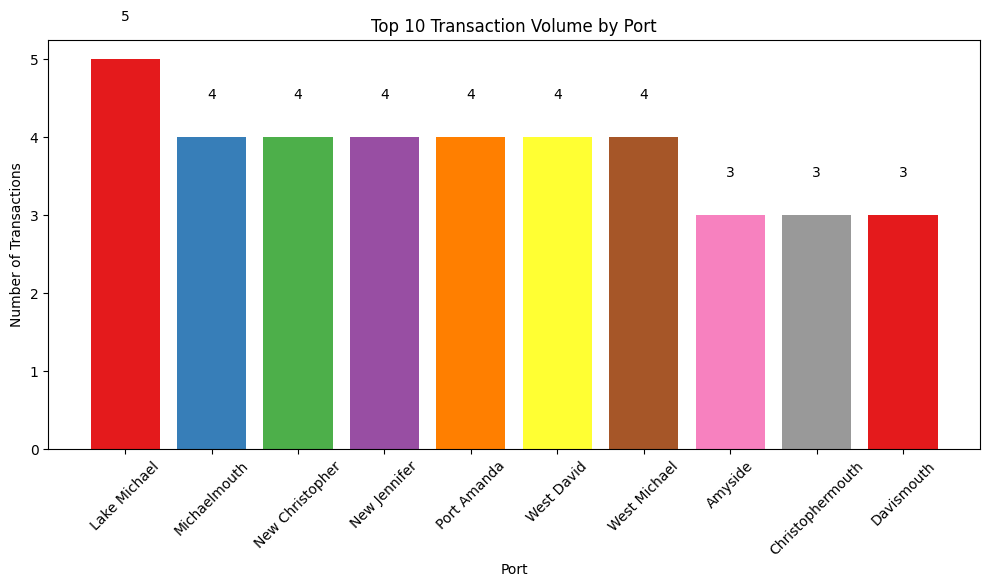

In [9]:
# Calculate transaction volume by port
port_agg = df.groupby('Port')['Transaction_ID'].count().nlargest(10)

# Bar Chart for Transaction Volume by Port
plt.figure(figsize=(10, 6))
plt.bar(port_agg.index, port_agg.values, color=sns.color_palette('Set1'))
plt.title('Top 10 Transaction Volume by Port')
plt.xlabel('Port')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)

# Add data labels on the bars
for i, value in enumerate(port_agg.values):
    plt.text(i, value + 0.5, str(value), ha='center')

plt.tight_layout()
plt.show()

#### **8. Wight vs Transaction Value:**

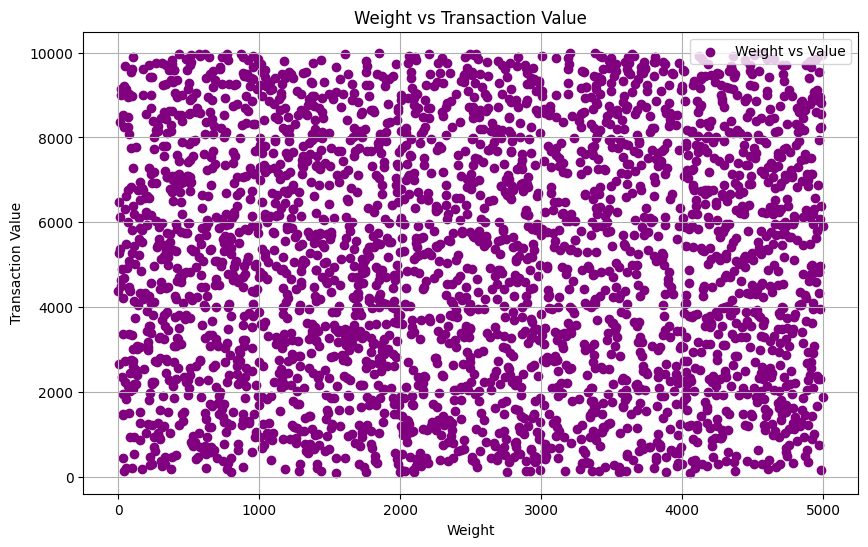

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Weight'], df['Value'], color='purple', label='Weight vs Value')
plt.title('Weight vs Transaction Value')
plt.xlabel('Weight')
plt.ylabel('Transaction Value')
plt.grid(True)
plt.legend()
plt.show()

#### **9. Payment Terms Distribution by Country:**

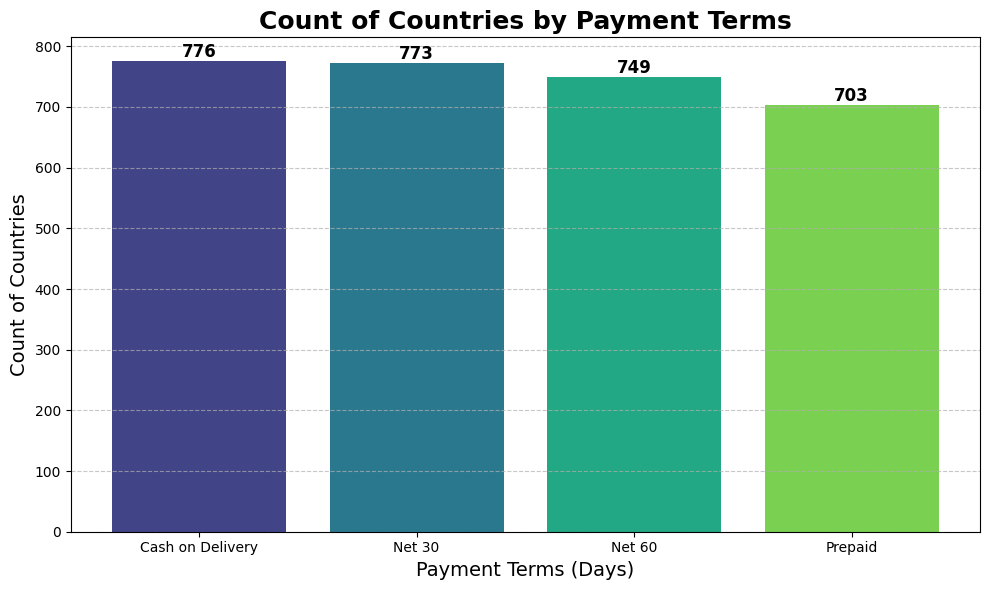

In [11]:
# Count the number of countries for each payment term
payment_terms_count = df['Payment_Terms'].value_counts().sort_index()

# Define a vibrant color palette
colors = sns.color_palette("viridis", len(payment_terms_count))

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(payment_terms_count.index, payment_terms_count.values, color=colors)

# Adding data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval), ha='center', va='bottom', fontsize=12, fontweight='bold')

# Titles and Labels
plt.title('Count of Countries by Payment Terms', fontsize=18, fontweight='bold')
plt.xlabel('Payment Terms (Days)', fontsize=14)
plt.ylabel('Count of Countries', fontsize=14)
plt.xticks(rotation=0)  # No rotation needed for x labels
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add dashed gridlines for better readability
plt.tight_layout()
plt.show()

#### **10. Top 5 Customers by Transaction Value**

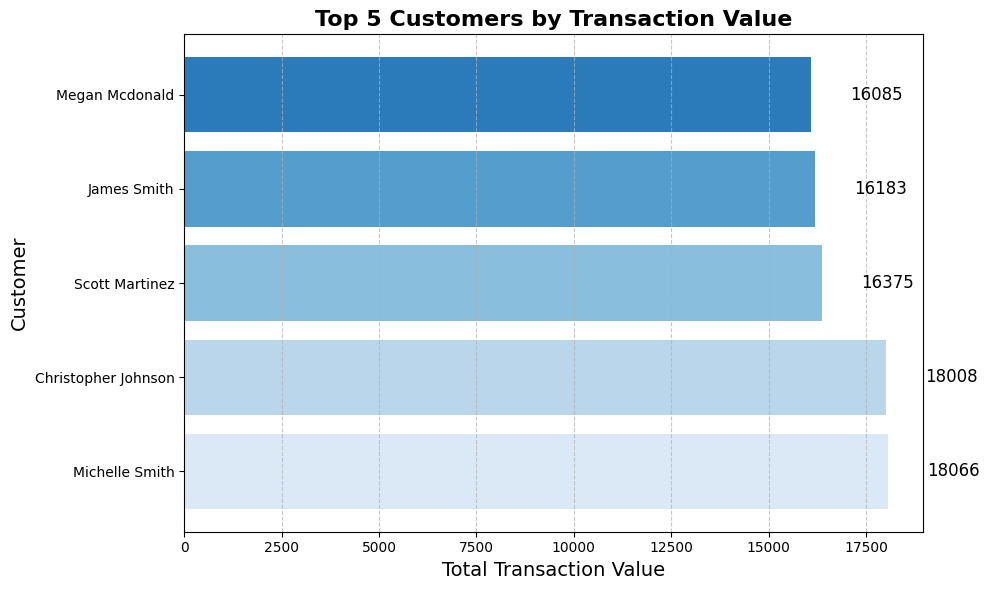

In [12]:
# Calculate top 5 customers by transaction value
top_customers = df.groupby('Customer')['Value'].sum().nlargest(5)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(top_customers.index, top_customers.values, color=sns.color_palette('Blues'))

# Adding data labels to the bars
for bar in bars:
    plt.text(bar.get_width() + 1000, bar.get_y() + bar.get_height()/2,
             int(bar.get_width()), ha='left', va='center', fontsize=12)

# Titles and Labels
plt.title('Top 5 Customers by Transaction Value', fontsize=16, fontweight='bold')
plt.xlabel('Total Transaction Value', fontsize=14)
plt.ylabel('Customer', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add dashed gridlines for better readability
plt.tight_layout()
plt.show()

### **OBSERVATIONS:**
**1. Transaction Value Distribution by Country:**
Finland is having the highest Transaction Value. The difference from all other countries' transaction figures is significant in case of Finland.

**2. Correlation Between Quantity and Transaction Value:**
There is a moderate positive correlation between the quantity of goods and the transaction value. However, the relationship is not linear, indicating that higher quantities do not always guarantee higher transaction values.

**3. Shipping Method Comparison by Transaction Value:**
Sea transport dominates the total transaction value, significantly outperforming other shipping methods like air or land.

**4. Top Products by Transaction Value:**
A few products, such as mother and family, contribute disproportionately to the total transaction value, while others show less impact.

**5. Top Suppliers by Transaction Value:**
The top 10 suppliers generate a substantial portion of the overall transaction value, indicating that supplier performance is critical to business success. Johnson Inc. is having a significantly lead in the race.

**6. Import vs Export Revenue Share:**
There is a roughly even distribution between import and export transaction values, suggesting balanced trade activity.

**7. Transaction Volume by Port:**
A number of ports handle a significant volume of transactions, making these key logistics hubs for international trade. There's no major difference seen. But the count of moderate numbered transactions are high in case of Top 10 ports.

**8. Weight vs Transaction Value:**
There is a moderate positive correlation between the weight of goods and the transaction value, with higher weights generally leading to higher transaction values.

**9. Payment Terms Distribution by Country:**
Net 30 and Cash on Delivery- terms are the most common payment terms across countries, while other terms are less frequently used. But the counts are near to each other.

**10. Top Customers by Transaction Value:**
A small number of customers are responsible for the majority of transaction value, emphasizing the importance of key clients, Christopher Johnson and Michelle Smith going almost head to head.

### **MANAGERIAL INSIGHTS:**

**1. High Transaction Value of Finland:**
- Finland stands out as the top contributor in terms of transaction value. The significant difference between Finland and other countries suggests that focused efforts on strengthening business relations, increasing product offerings, and possibly negotiating better terms in this region could further boost profitability. Finland should be a priority market for expansion and resource allocation.

**2. Quantity and Transaction Value Strategy:**
- While there is a moderate positive correlation between the quantity of goods and transaction value, the non-linear relationship indicates that simply increasing the quantity may not guarantee higher revenues. Companies should focus on optimizing product mix, pricing strategies, and understanding the value drivers beyond quantity, such as product quality, brand recognition, or market demand.

**3. Shipping Method Optimization:**
- The dominance of sea transport in transaction value indicates that it is the most cost-effective and efficient shipping method. Focusing logistics efforts on improving sea shipping efficiency could further reduce costs and improve delivery times. Other shipping methods like air and land should be reserved for more urgent, high-margin items where speed is critical.

**4. Product Strategy for High Transaction Items:**
- Since products like "mother" and "family" contribute disproportionately to transaction value, the company should prioritize these products in marketing campaigns, product development, and inventory management. Efforts should be made to continuously innovate in these product categories and ensure they receive priority in the supply chain.

**5. Supplier Relationship Management (Johnson Inc.):**
- Johnson Inc. being the top supplier highlights the importance of building and maintaining a strong relationship with this company. Negotiating favorable terms and ensuring consistent communication will be critical. Exploring opportunities to collaborate on product innovation or supply chain improvements could further boost transaction value.

**6. Balanced Import and Export Strategy:**
- With a balanced revenue share between imports and exports, maintaining a dual focus on both sides of the trade will ensure stable growth. The company should work on optimizing processes for both imports and exports, with dedicated teams or strategies for each to ensure neither aspect is neglected.

**7. Port Logistics and Efficiency:**
- The moderate but consistent transaction volume across multiple ports suggests that these logistics hubs are important for the company’s operations. Ensuring port-related activities are streamlined, investing in relationships with port authorities, and improving port logistics can ensure faster processing and cost savings. Since there is no major discrepancy in port efficiency, a generalized improvement in port handling processes would suffice.

**8. Managing Heavy Weight Goods:**
- As higher weights generally correlate with higher transaction values, efficient handling and shipping of heavier goods can lead to increased profitability. Investment in specialized equipment and transportation options for handling heavy goods should be considered to maintain cost-effective operations.

**9. Payment Terms Strategy:**
- With "Net 30" and "Cash on Delivery" being the most common payment terms, the company should continue leveraging these terms when negotiating with clients. Offering flexible payment terms in certain regions could help secure larger contracts. Moreover, closely monitoring payment cycles can optimize cash flow and working capital.

**10. Key Customer Retention:**
- The top customers, Christopher Johnson and Michelle Smith, account for a large portion of the transaction value, and maintaining strong relationships with them should be a priority. Personalized services, loyalty programs, or exclusive deals could help retain these customers and possibly increase their purchasing volumes over time.

### **Conclusion:**

This analysis highlights Finland as the top-performing market and products like "mother" and "family" as key revenue drivers. Sea transport is the most cost-effective shipping method, and top suppliers like Johnson Inc. and key customers such as Christopher Johnson significantly contribute to the company’s success.

Balanced import-export activities, coupled with optimized shipping logistics, supplier management, and flexible payment terms, will strengthen the company's trade operations. Focusing on high-value markets, products, and clients will position the company for sustained growth and improved profitabilty.
